In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msn


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from scipy import stats
import joblib

In [ ]:
# Loading Data
train_df = pd.read_csv('Flight_Train.csv')
train_df.set_index('ID', inplace=True)
test_df = pd.read_csv('Flight_Test.csv')
test_df.set_index('ID', inplace=True)

### Preview the dataset

In [ ]:
train_df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [ ]:
#checking the last few rows
train_df.tail()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [ ]:
test_df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [ ]:
test_df.tail()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD
test_id_9332,2018-09-19,UG 0009,DJE,TUN,2018-09-19 16:15:00,2018-09-19 17.15.00,SCH,UG AT7LBD


##EDA

In [ ]:
train_df.dtypes

DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

### View summary of dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DATOP   107833 non-null  object 
 1   FLTID   107833 non-null  object 
 2   DEPSTN  107833 non-null  object 
 3   ARRSTN  107833 non-null  object 
 4   STD     107833 non-null  object 
 5   STA     107833 non-null  object 
 6   STATUS  107833 non-null  object 
 7   AC      107833 non-null  object 
 8   target  107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.2+ MB


In [ ]:
train_df.shape


(107833, 9)

### Check for missing values in dataset

<Axes: >

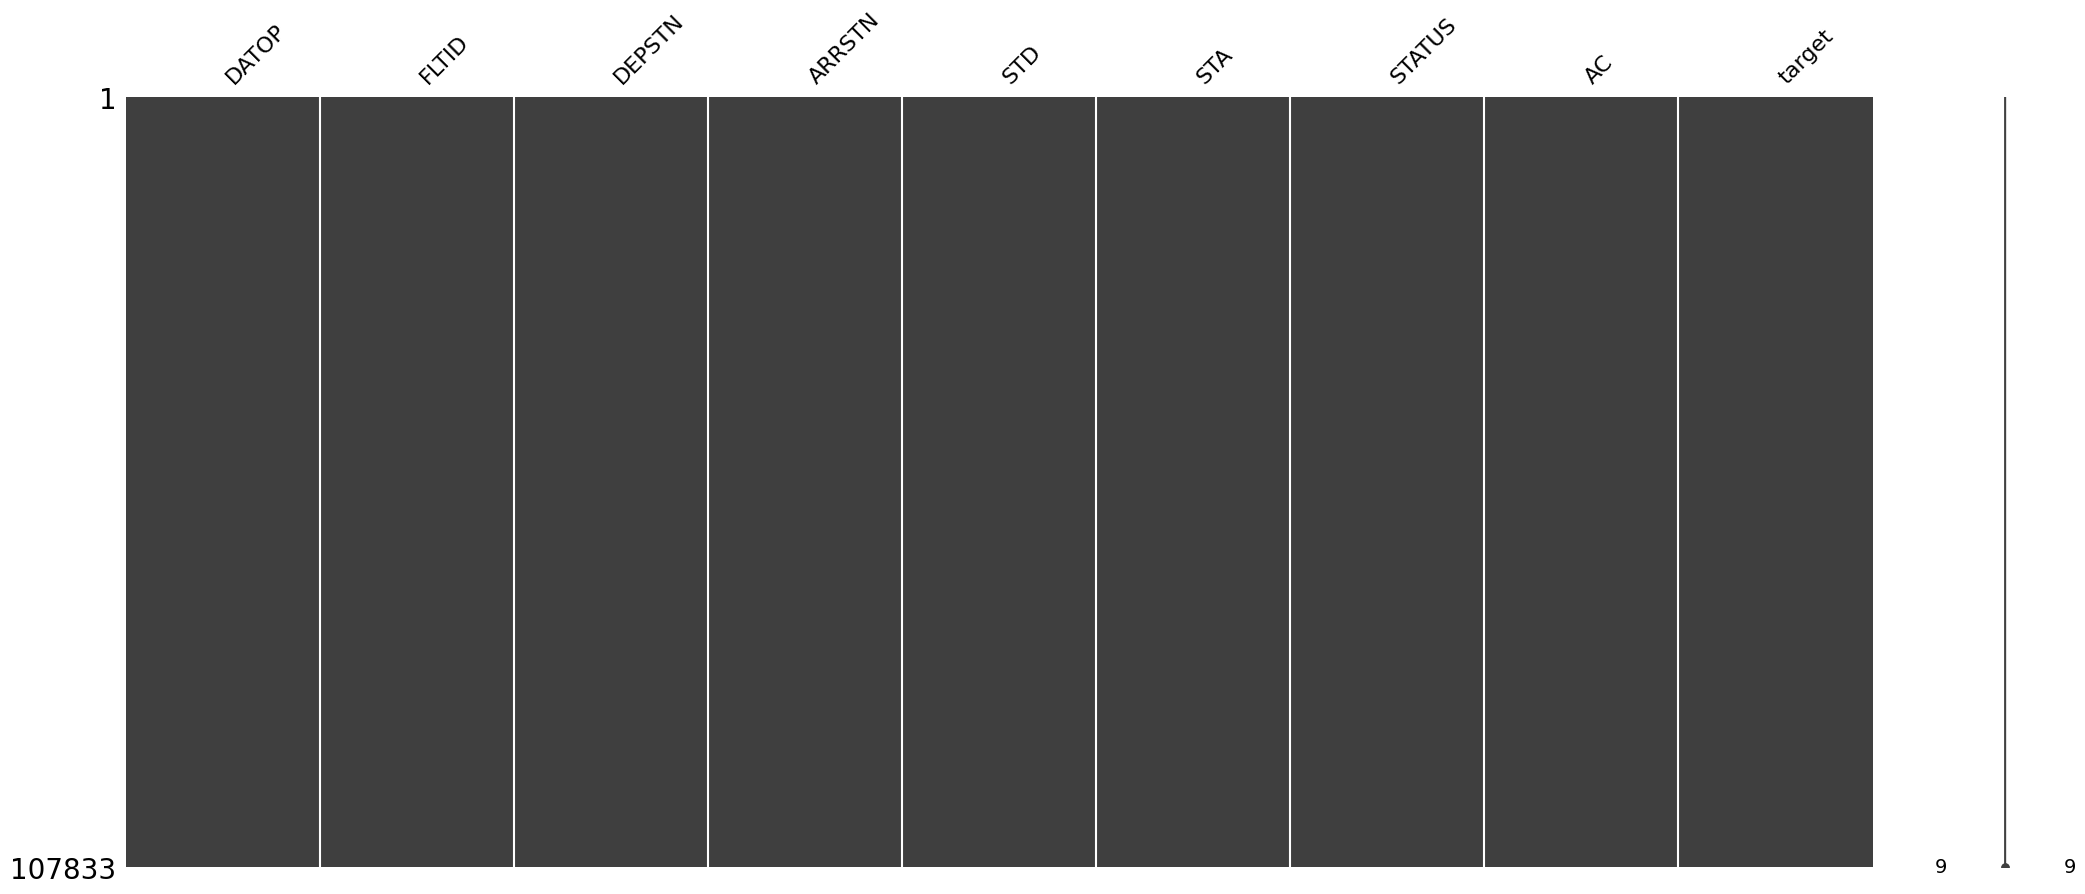

In [ ]:
#visualizing missing data
msn.matrix(train_df)

In [ ]:
train_df.isnull().sum()


DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [ ]:
#Duplicated values
data_dup = train_df.duplicated().any()
data_dup

False


We can see that, there are 8 character variables (data type = object) and 1 numerical variables (data type = float64).


### View the statistical summary of numerical variables

In [ ]:
train_df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


There are 8 categorical variables in the dataset. exploring them one by one.
To iddentify those approximately to unique identifiers (that is 107833)
So we can decide if they are dropped or not.

### Explore `DATOP` variable

In [ ]:
# view the labels in the variable

train_df['DATOP'].unique()

array(['2016-01-03', '2016-01-13', '2016-01-16', ..., '2018-12-28',
       '2018-12-29', '2018-12-30'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['DATOP'].unique())

1011

We can see that there are 1011 categories of labels in the ` DATOP` variable.

### Explore `FLTID` variable

In [ ]:
# view the unique values in the column status_published

train_df['FLTID'].unique()

array(['TU 0712 ', 'TU 0757 ', 'TU 0214 ', ..., 'UG 1020 ', 'UG 1501 ',
       'UG 1004 '], dtype=object)

In [ ]:
# view how many different types of values are there

len(train_df['FLTID'].unique())

1861

We can see that there are 1861 categories of labels in the ` FLTID` variable.

### Explore `DEPSTN` variable

In [ ]:
# view the labels in the variable

train_df ['DEPSTN'].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'ARN', 'CPH', 'CRL', 'OST', 'TNG',
       'GAF', 'NAP', 'BRQ', 'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN',
       'EBL', 'GAE', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM',
       'TBJ', 'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV',
       'CKY', 'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE',
       'CAG', 'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX',
       'FIH', 'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'VKO', 'AAE', 'BRI',
       'VRN', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'SJJ', 'KRR',

In [ ]:
# view how many different types of variables are there

len(train_df['DEPSTN'].unique())

132

We can see that there are 132 categories of labels in the ` DEPSIN` variable.

### Explore ` ARRSTN ` variable

In [ ]:
# view the labels in the variable

train_df ['ARRSTN'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

In [ ]:
# view how many different types of variables are there

len(train_df['ARRSTN'].unique())

128

We can see that there are 128 categories of labels in the ` ARRSTN` variable.

### Explore `  STD ` variable

In [ ]:
# view the labels in the variable

train_df ['STD'].unique()

array(['2016-01-03 10:30:00', '2016-01-13 15:05:00',
       '2016-01-16 04:10:00', ..., '2018-11-07 05:00:00',
       '2018-01-23 18:00:00', '2018-11-13 06:15:00'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STD'].unique())

81697

We can see that there are 81697 categories of labels in the ` STD ` variable.

### Explore ` STA ` variable

In [ ]:
# view the labels in the variable

train_df ['STA'].unique()

array(['2016-01-03 12.55.00', '2016-01-13 16.55.00',
       '2016-01-16 06.45.00', ..., '2018-12-20 01.45.00',
       '2018-01-23 18.45.00', '2018-11-13 07.05.00'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STA'].unique())

85136

We can see that there are 85136 categories of labels in the ` STA ` variable.

### Explore ` STATUS ` variable

In [ ]:
# view the labels in the variable

train_df ['STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STATUS'].unique())

5

We can see that there are 5 categories of labels in the ` STATUS ` variable.

### Explore `  AC ` variable

In [ ]:
# view the labels in the variable

train_df ['AC'].unique()

array(['TU 32AIMN', 'TU 31BIMO', 'TU 736IOK', 'TU 320IMU', 'TU 736IOP',
       'TU 32AIMH', 'TU 32AIMI', 'TU 32AIMC', 'TU 31AIMK', 'TU 32AIMF',
       'TU 32AIMP', 'TU 320IMR', 'TU 332IFN', 'TU 31AIMJ', 'TU 320IMT',
       'TU 736IOL', 'TU 31BIMQ', 'TU 736IOR', 'TU 320IMV', 'TU 320IMS',
       'TU 332IFM', 'TU 320IMW', 'TU 32AIML', 'TU 32AIMD', 'TU 32AIMM',
       'TU CR9ISA', 'TU 32AIMG', 'TU 736ION', 'TU 736IOM', 'TU 736IOQ',
       '5M 343SUN', 'UG AT7LBD', '5K 343TQY', 'UG AT7LBE', 'UG AT7AT7',
       'BJ 320INP', 'BJ 320INH', 'BJ 320INQ', 'BJ 320INA', 'UG CR9XXX',
       'UG CR9CR9', 'TU 32A32A', 'BJ 320INB', 'GJ 734CGC', 'QS 738TSC',
       'PS 738PSD', 'D4 319CQG', 'BJ 320INR', 'BJ 320INC', 'UJ 320TCF',
       '5K 345TFX', 'D4 320CQP', '5M 343JAI', 'GW 320MQH', 'UG CR9ISA',
       '6P M87TRJ', 'TU CR9CR9', 'TU CR9XXX', 'GJ 733EWE', 'GJ 734PGC',
       'GJ 733GGC', 'GJ 734MGC', 'GJ 733LGC', '5M 343FOX', 'BJ 320INO',
       'OL 321ABY', 'X9 320VEB', 'TU 320320'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['AC'].unique())

68

In [ ]:
train_df

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...
train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0


We can see that there are 68 categories of labels in the ` STATUS ` variable.

## Feature Engineering:

### **Convert categorical variable into integers** <a class="anchor" id="10"></a>

In [ ]:
#instantiate encoder
le = LabelEncoder()

#select all variables of datatype - object
cat_vars = train_df.select_dtypes(include=object)
num_vars = train_df.select_dtypes(exclude=object)


cat_vars_label_encoded = cat_vars.apply(le.fit_transform)
num_vars_label_encoded = num_vars.apply(le.fit_transform)

In [ ]:
cat_vars

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU
...,...,...,...,...,...,...,...,...
train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML
train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7
train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK


In [ ]:
cat_vars_label_encoded

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
train_id_0,2,230,31,119,170,173,0,46
train_id_1,12,257,86,119,827,849,0,28
train_id_2,15,86,123,58,978,1005,0,46
train_id_3,16,164,37,91,1094,1122,0,50
train_id_4,16,136,123,4,1096,1115,0,34
...,...,...,...,...,...,...,...,...
train_id_107828,860,1859,123,119,68648,71563,4,44
train_id_107829,687,1747,37,119,54288,56590,4,60
train_id_107830,956,75,123,119,77757,81142,4,50


In [ ]:
cat_vars_label_encoded.dtypes

DATOP     int64
FLTID     int64
DEPSTN    int64
ARRSTN    int64
STD       int64
STA       int64
STATUS    int64
AC        int64
dtype: object

In [ ]:
num_vars

,target
ID,
train_id_0,260.0
train_id_1,20.0
train_id_2,0.0
train_id_3,0.0
train_id_4,22.0
...,...
train_id_107828,0.0
train_id_107829,0.0
train_id_107830,0.0


In [ ]:
# Merge num_vars and cat_vars_label_encoded

train_df_back = pd.merge(left = cat_vars, right=num_vars_label_encoded, left_index=True, right_index=True)
new_train_df = pd.merge(left = cat_vars_label_encoded, right=num_vars_label_encoded, left_index=True, right_index=True)

In [ ]:
train_df_back

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22
...,...,...,...,...,...,...,...,...,...
train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0
train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0
train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0


In [ ]:
new_train_df

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2,230,31,119,170,173,0,46,260
train_id_1,12,257,86,119,827,849,0,28,20
train_id_2,15,86,123,58,978,1005,0,46,0
train_id_3,16,164,37,91,1094,1122,0,50,0
train_id_4,16,136,123,4,1096,1115,0,34,22
...,...,...,...,...,...,...,...,...,...
train_id_107828,860,1859,123,119,68648,71563,4,44,0
train_id_107829,687,1747,37,119,54288,56590,4,60,0
train_id_107830,956,75,123,119,77757,81142,4,50,0


In [ ]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DATOP   107833 non-null  int64
 1   FLTID   107833 non-null  int64
 2   DEPSTN  107833 non-null  int64
 3   ARRSTN  107833 non-null  int64
 4   STD     107833 non-null  int64
 5   STA     107833 non-null  int64
 6   STATUS  107833 non-null  int64
 7   AC      107833 non-null  int64
 8   target  107833 non-null  int64
dtypes: int64(9)
memory usage: 12.3+ MB


In [ ]:
new_train_df.dtypes

DATOP     int64
FLTID     int64
DEPSTN    int64
ARRSTN    int64
STD       int64
STA       int64
STATUS    int64
AC        int64
target    int64
dtype: object

### Dropping selected variables here
 Not important features for predicting flight delays


Dropping `FLTID ` variable from the dataset

In [ ]:
new_train_df.drop(['FLTID'], axis=1, inplace=True)

In [ ]:
#Preview of the dataset
new_train_df.describe()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
count,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000
mean,516.326941,88.144242,85.853449,40676.857075,42337.534484,0.509445,42.024714,47.031206
std,288.807837,37.730644,36.215214,23599.594305,24667.382465,1.322331,10.647529,96.773014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.000000,55.000000,55.000000,20064.000000,20750.000000,0.000000,34.000000,0.000000
50%,521.000000,96.000000,94.000000,40727.000000,42353.000000,0.000000,42.000000,14.000000
75%,777.000000,123.000000,119.000000,61128.000000,63737.000000,0.000000,50.000000,43.000000
max,1010.000000,131.000000,127.000000,81696.000000,85135.000000,4.000000,67.000000,967.000000


In [ ]:
new_train_df.head()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,
train_id_0,2,31,119,170,173,0,46,260
train_id_1,12,86,119,827,849,0,28,20
train_id_2,15,123,58,978,1005,0,46,0
train_id_3,16,37,91,1094,1122,0,50,0
train_id_4,16,123,4,1096,1115,0,34,22


In [ ]:
new_train_df.tail()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,
train_id_107828,860,123,119,68648,71563,4,44,0
train_id_107829,687,37,119,54288,56590,4,60,0
train_id_107830,956,123,119,77757,81142,4,50,0
train_id_107831,697,123,37,55027,57360,0,58,0
train_id_107832,962,123,37,78178,81542,4,58,0


### Performing correlation analysis:
TO identify important features for predicting flight delays
And dropping least features


Calculating the correlation coefficients between features and the target variable  using the corr() function

In [ ]:
correlation_matrix = new_train_df.corr()

Visualize the correlation matrix:
Plot the correlation matrix using Matplotlib:

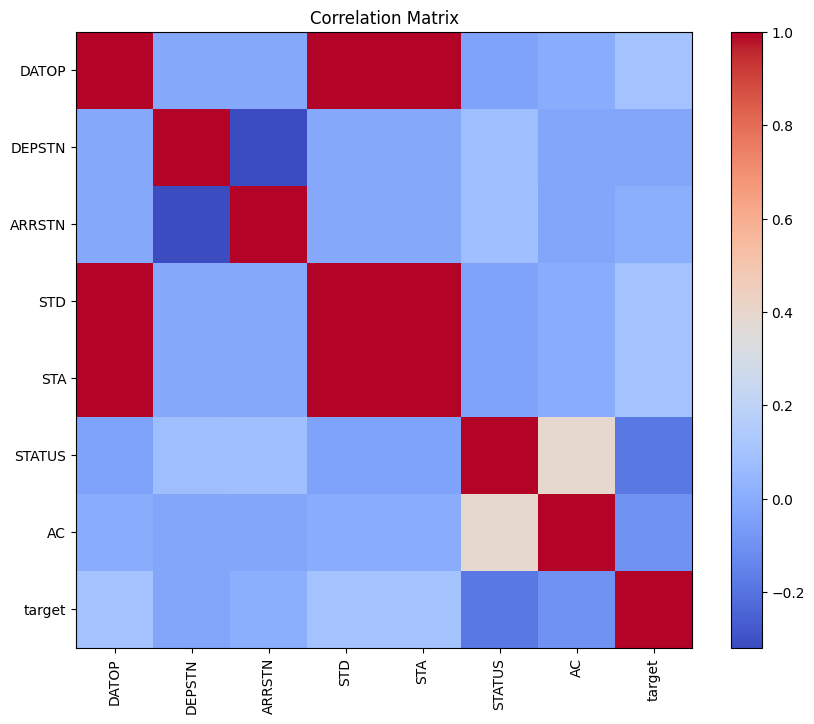

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


DATOP has got a strong correlaion with STD and STD
Therefore seems important for flight delay prediction
hence column shouldn't be deleted.

Looking at AC correlation with target.
column can be dropped.

<ipython-input-410-36c3628ea65b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', data=new_train_df, palette='viridis')


<Axes: xlabel='STATUS', ylabel='count'>

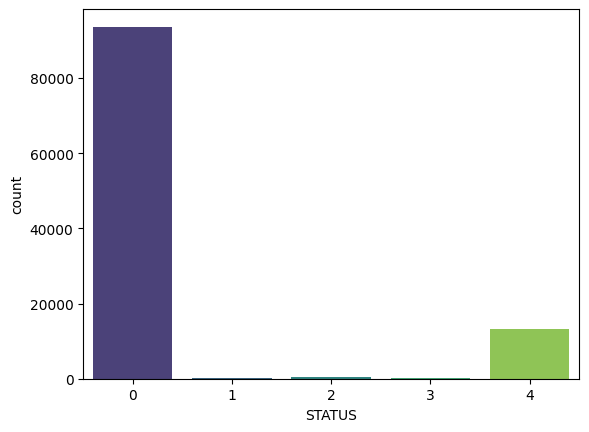

In [ ]:
sns.countplot(x='STATUS', data=new_train_df, palette='viridis')

labels ' ATA' - 0, 'SCH'- 4,

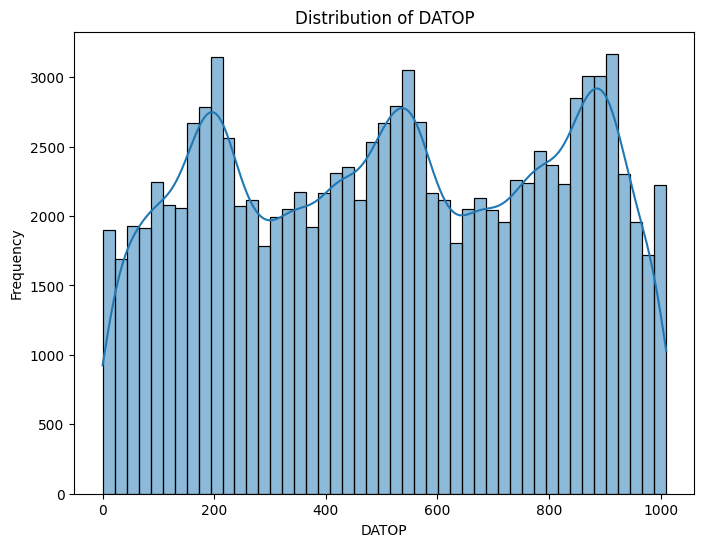

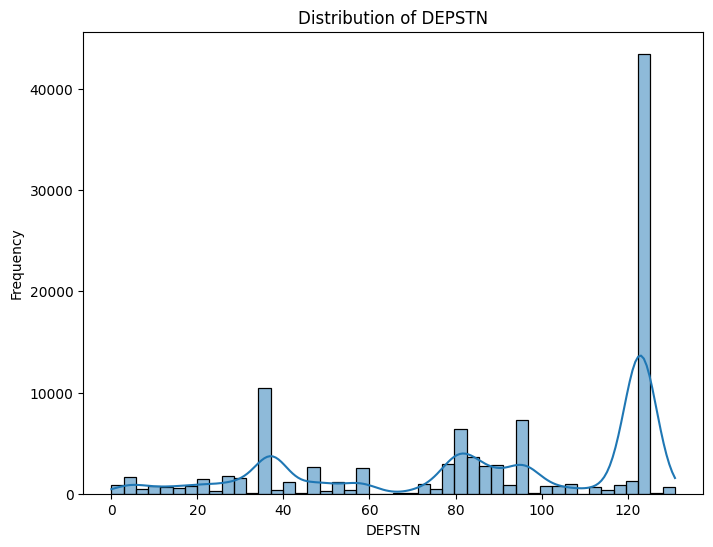

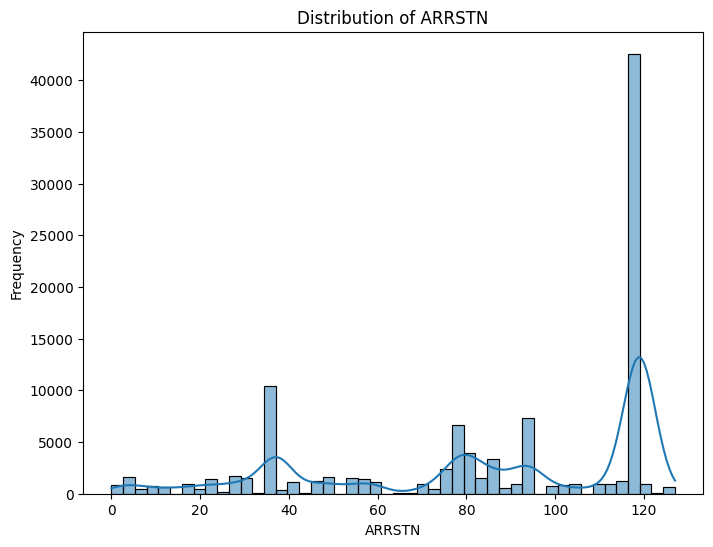

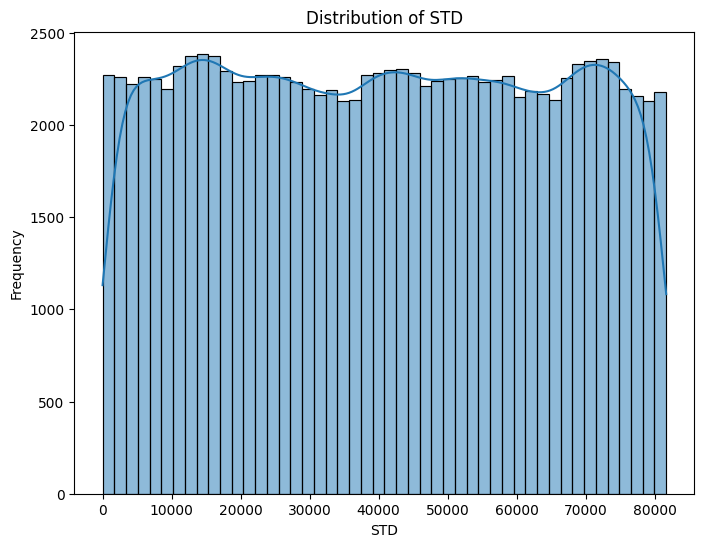

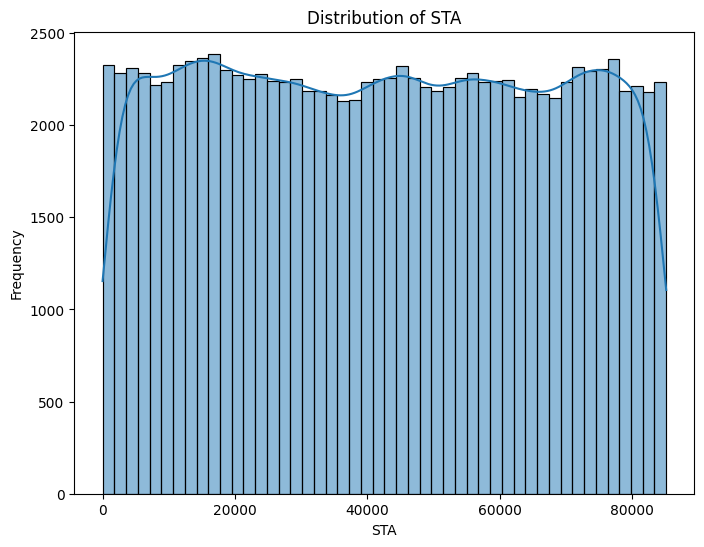

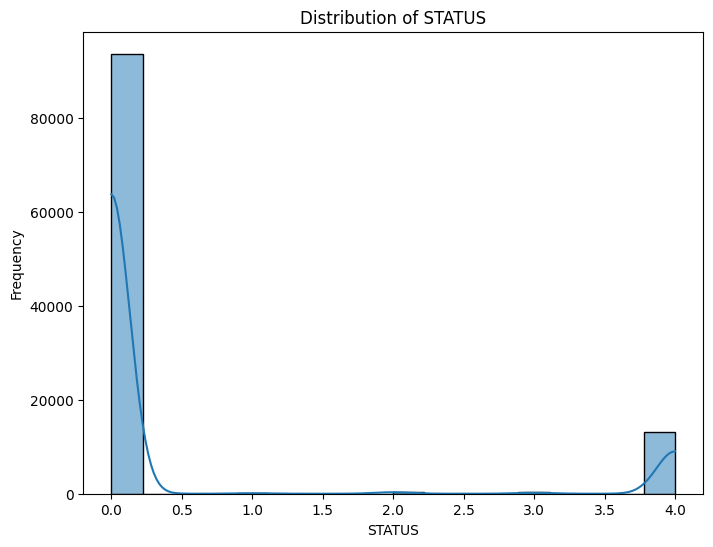

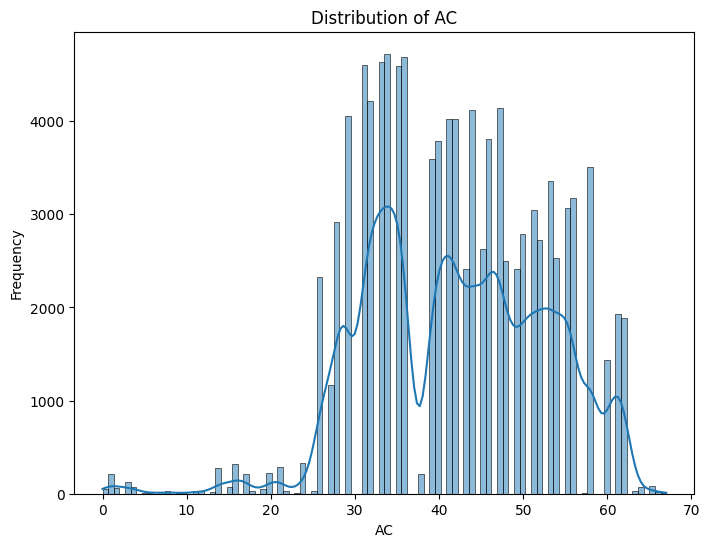

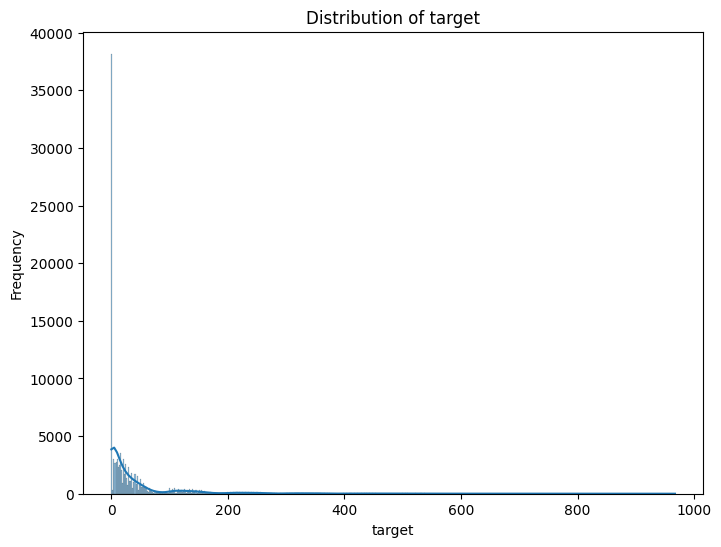

In [ ]:
# Visualize data distribution
def visualize_distribution(data):
    for col in data.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

visualize_distribution(new_train_df)

## Create the ML dataset

Separate the features from the labels in preparation for splitting and model training

In [ ]:
X = new_train_df.drop('target',axis=1)
y = new_train_df['target']

In [ ]:
X.head()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,
train_id_0,2,31,119,170,173,0,46
train_id_1,12,86,119,827,849,0,28
train_id_2,15,123,58,978,1005,0,46
train_id_3,16,37,91,1094,1122,0,50
train_id_4,16,123,4,1096,1115,0,34


### View the summary of X

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DATOP   107833 non-null  int64
 1   DEPSTN  107833 non-null  int64
 2   ARRSTN  107833 non-null  int64
 3   STD     107833 non-null  int64
 4   STA     107833 non-null  int64
 5   STATUS  107833 non-null  int64
 6   AC      107833 non-null  int64
dtypes: int64(7)
memory usage: 10.6+ MB


In [ ]:
X.describe()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC
count,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000,107833.000000
mean,516.326941,88.144242,85.853449,40676.857075,42337.534484,0.509445,42.024714
std,288.807837,37.730644,36.215214,23599.594305,24667.382465,1.322331,10.647529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.000000,55.000000,55.000000,20064.000000,20750.000000,0.000000,34.000000
50%,521.000000,96.000000,94.000000,40727.000000,42353.000000,0.000000,42.000000
75%,777.000000,123.000000,119.000000,61128.000000,63737.000000,0.000000,50.000000
max,1010.000000,131.000000,127.000000,81696.000000,85135.000000,4.000000,67.000000


In [ ]:
y.head()

ID
train_id_0    260
train_id_1     20
train_id_2      0
train_id_3      0
train_id_4     22
Name: target, dtype: int64

### Split The Dataset into training and test sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,  random_state=42)
X_train

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,
train_id_76952,887,81,74,71319,74397,0,46
train_id_39411,453,123,110,34673,35973,0,55
train_id_18120,49,81,87,3071,3144,0,50
train_id_100964,944,37,41,76867,80217,0,43
train_id_44997,411,79,119,31116,32271,0,39
...,...,...,...,...,...,...,...
train_id_54886,667,123,28,52762,55015,0,52
train_id_76820,805,123,46,63645,66351,0,29
train_id_103694,870,37,119,69624,72596,4,60


In [ ]:
X_test

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,
train_id_50752,637,123,113,50684,52829,0,28
train_id_33940,198,37,119,14816,15313,4,62
train_id_84915,759,81,94,59608,62156,0,53
train_id_70284,418,120,119,31713,32883,4,60
train_id_50655,657,36,119,52033,54253,0,44
...,...,...,...,...,...,...,...
train_id_67280,650,123,119,51578,53785,4,33
train_id_17079,108,123,18,7323,7493,0,44
train_id_74717,677,123,76,53525,55804,0,32


In [ ]:
y_test

ID
train_id_50752     13
train_id_33940      0
train_id_84915    453
train_id_70284      0
train_id_50655    239
                 ... 
train_id_67280      0
train_id_17079      0
train_id_74717     22
train_id_49709     10
train_id_12523     55
Name: target, Length: 32350, dtype: int64

In [ ]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',y_train.shape)
print(f'Testing Shape y:',y_test.shape)

Training Shape x: (75483, 7)
Testing Shape x: (32350, 7)
*****___________*****___________*****
Training Shape y: (75483,)
Testing Shape y: (32350,)


### Normalize features for better convergence

Anomality and Outliers identification
To choose whether to use StandardScaler or MinMaxScaler for scaling features.
Standscaler-when the data follows a Gaussian distribution (i.e., bell curve) and has outliers. Else MinMaxScaler

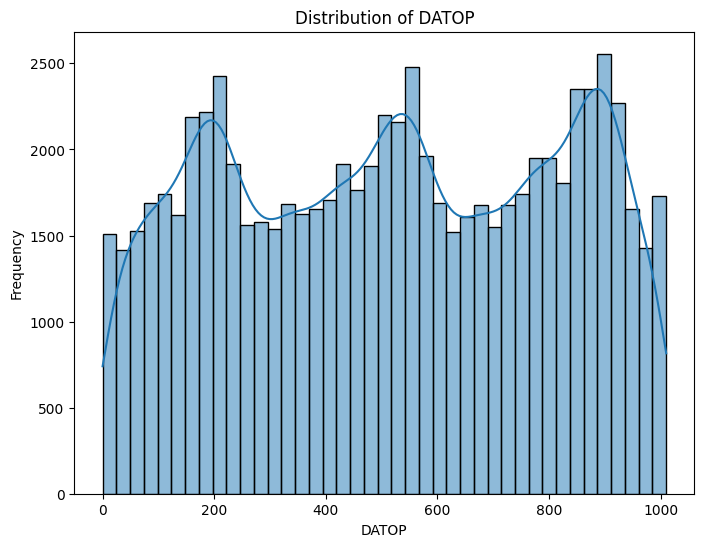

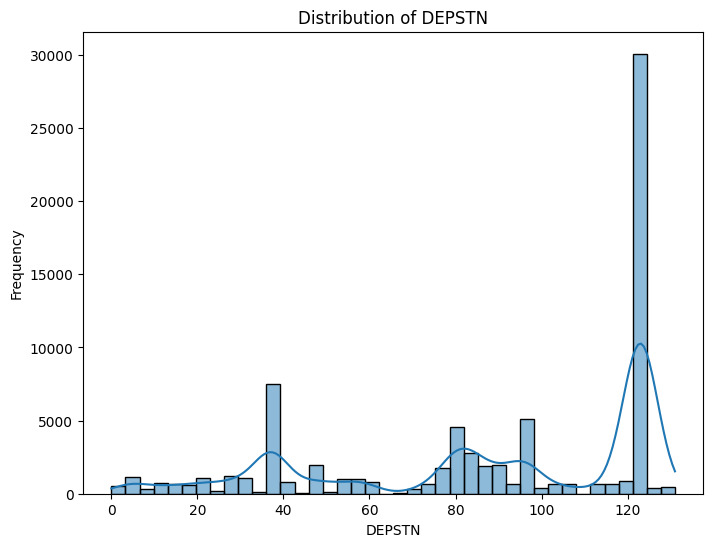

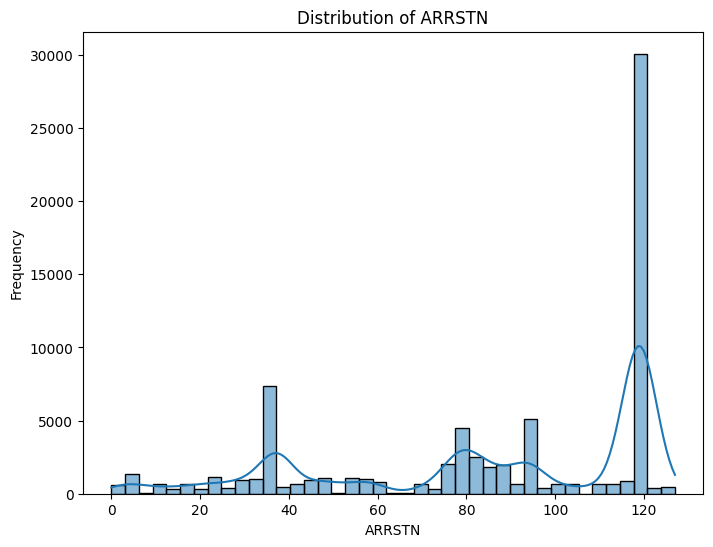

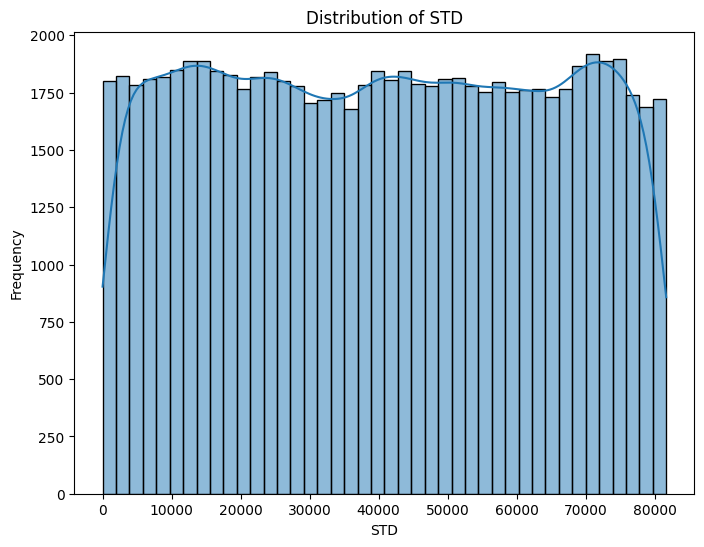

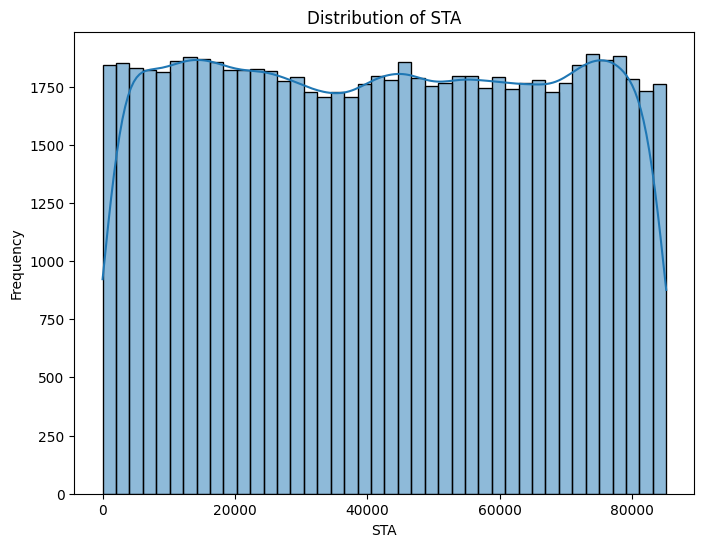

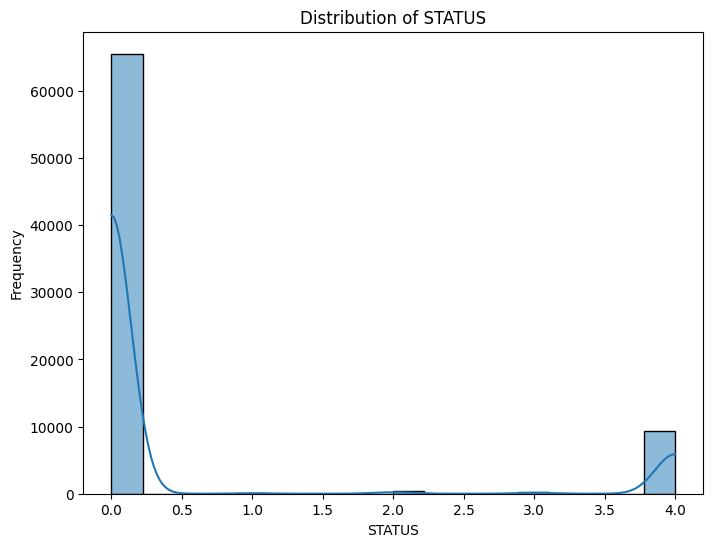

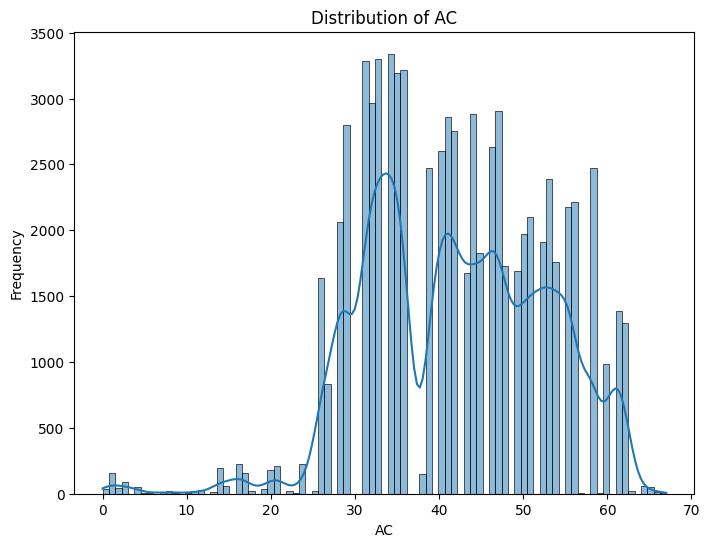

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: DATOP
Shapiro-Wilk Test Statistic: 0.9529, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


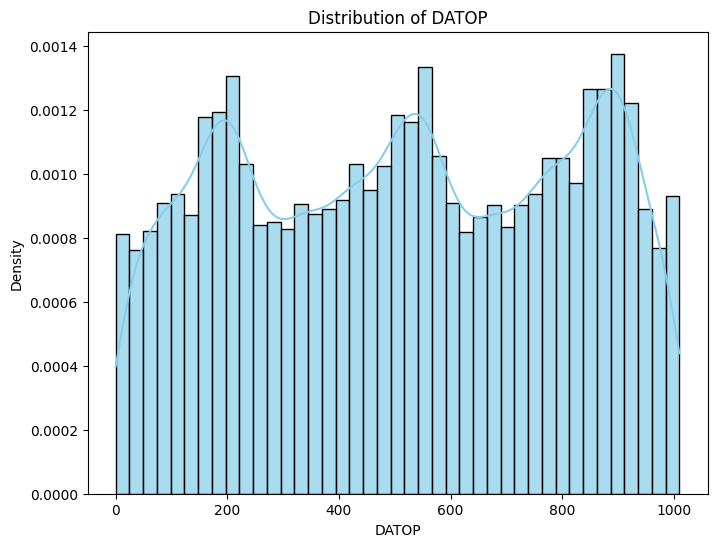

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: DEPSTN
Shapiro-Wilk Test Statistic: 0.8381, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


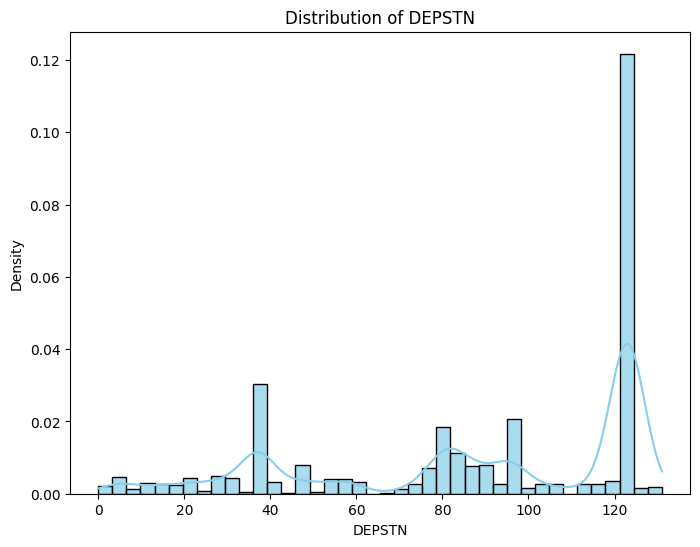

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: ARRSTN
Shapiro-Wilk Test Statistic: 0.8393, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


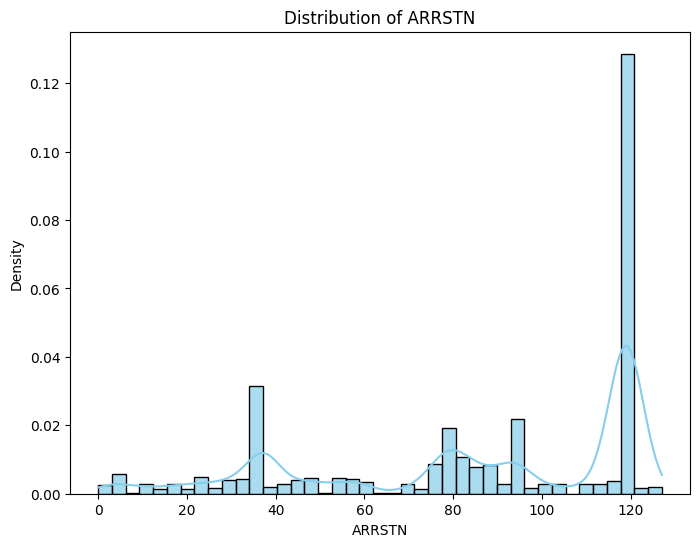

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: STD
Shapiro-Wilk Test Statistic: 0.9537, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


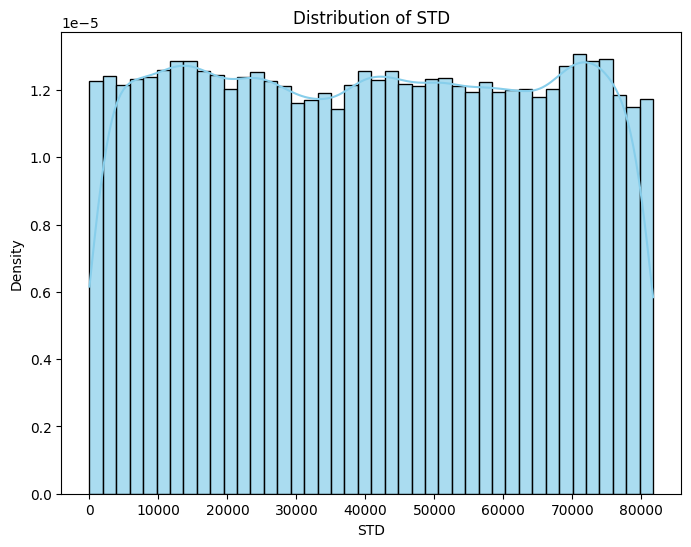

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: STA
Shapiro-Wilk Test Statistic: 0.9532, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


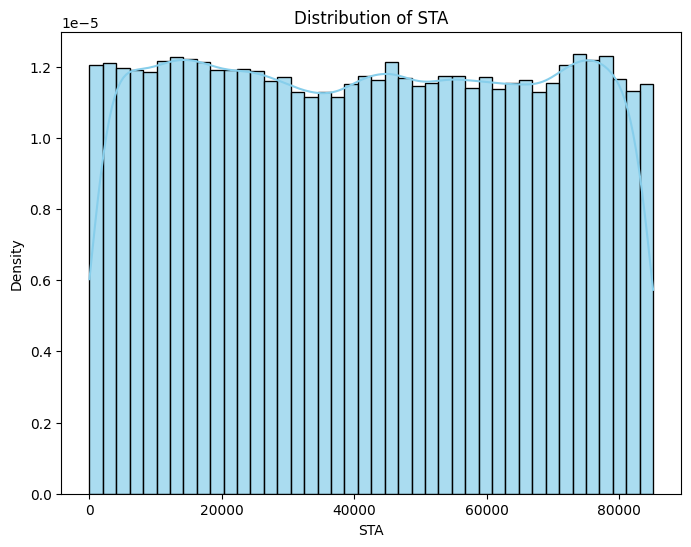

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: STATUS
Shapiro-Wilk Test Statistic: 0.3988, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


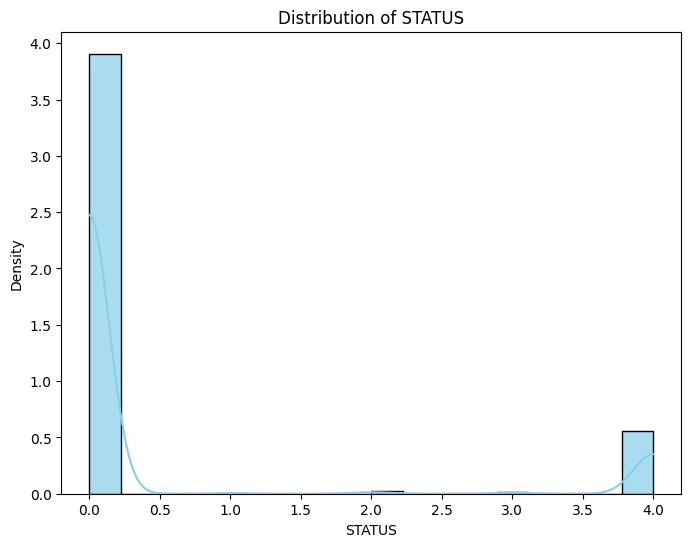

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: AC
Shapiro-Wilk Test Statistic: 0.9760, p-value: 0.0000
The data does not appear to be normally distributed.
----------------------------------------


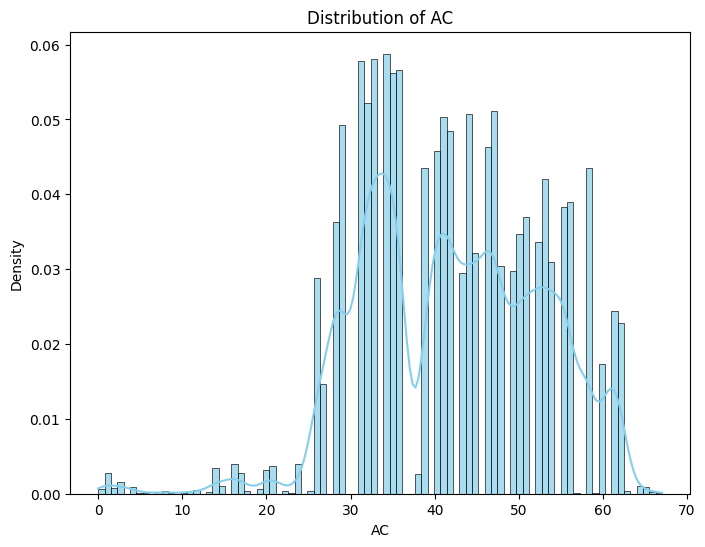

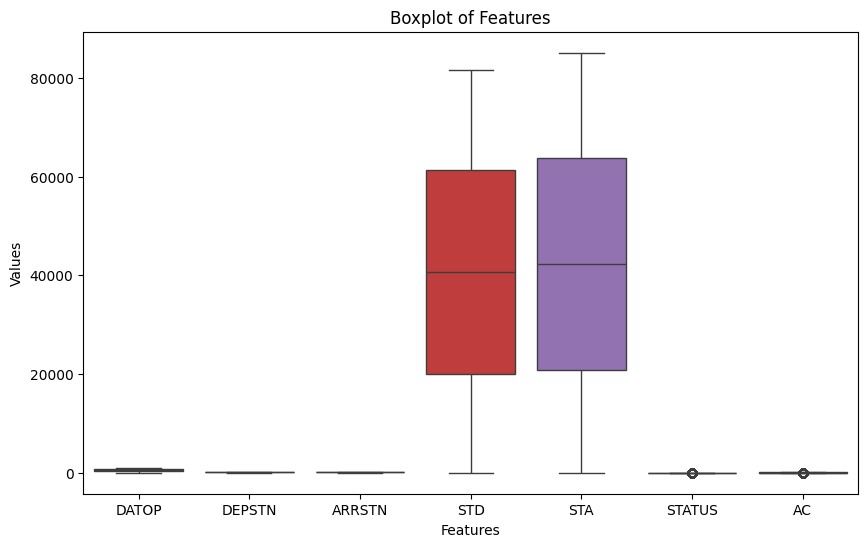

In [ ]:
from scipy.stats import norm, shapiro
import seaborn as sns

# Visualize the distribution of each feature
def visualize_distribution(data):
    for col in data.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Perform Shapiro-Wilk test for normality and visualize distributions
def test_normality(data):
    for col in data.columns:
        stat, p = shapiro(data[col])
        print(f'Variable: {col}')
        print(f'Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p:.4f}')
        if p > 0.05:
            print('The data appears to be normally distributed.')
        else:
            print('The data does not appear to be normally distributed.')
        print('-' * 40)
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True, stat="density", color='skyblue', alpha=0.7)


        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

# Visualize boxplots to identify outliers
def visualize_outliers(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title('Boxplot of Features')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

# Visualize data distribution
visualize_distribution(X_train)

# Perform Shapiro-Wilk test for normality and visualize distributions
test_normality(X_train)

# Visualize boxplots to identify outliers
visualize_outliers(X_train)


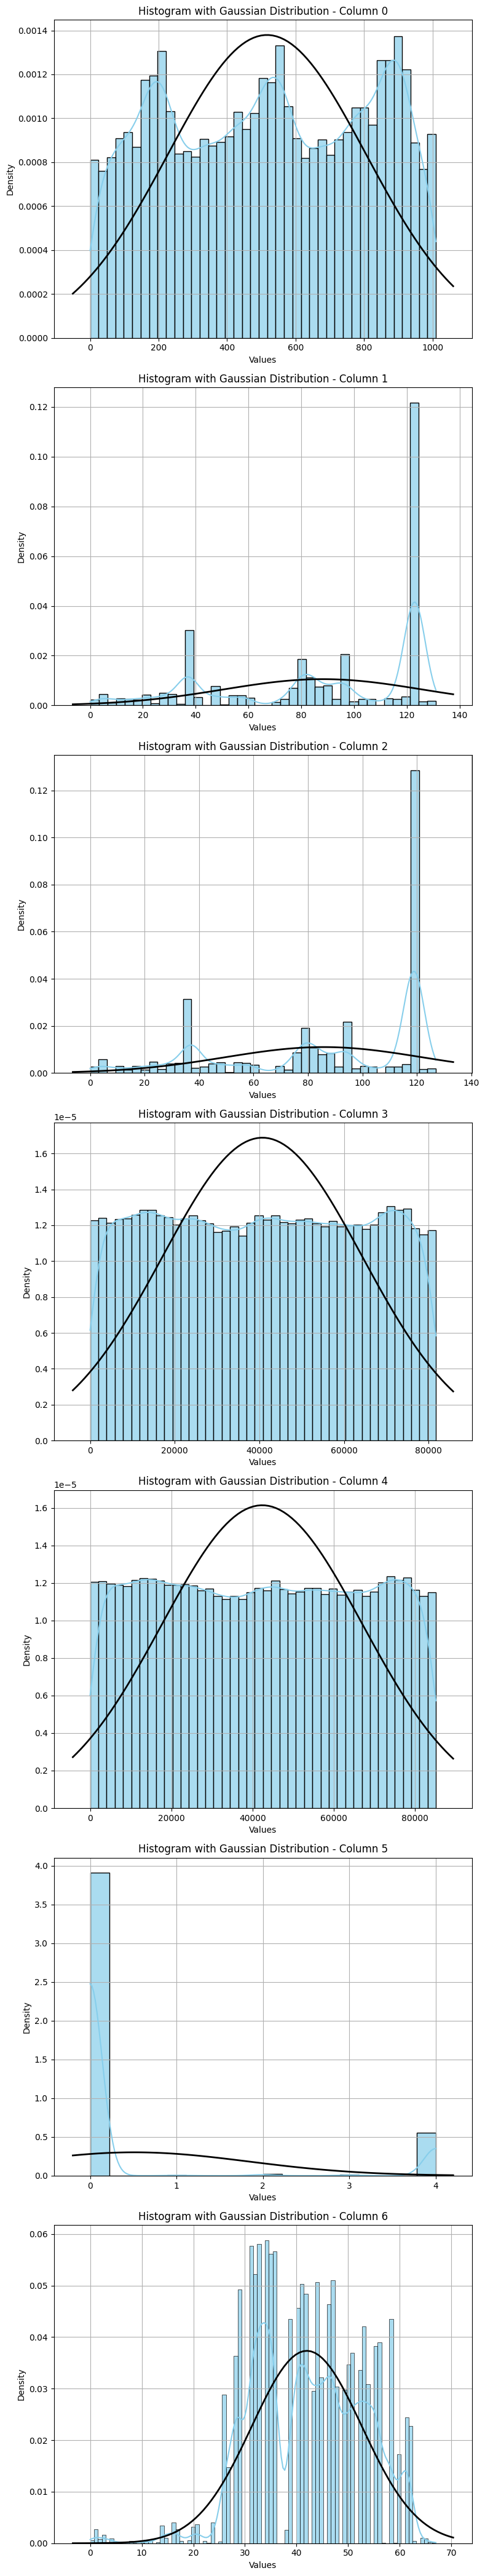

In [ ]:
from scipy.stats import norm

# Visualize Gaussian distribution for all columns using histograms
num_cols = X_train.shape[1]  # Number of columns in X_train2

fig, axs = plt.subplots(num_cols, 1, figsize=(8, 6*num_cols))

for i in range(num_cols):
    data_column = X_train.iloc[:, i]  # Select each column
    ax = axs[i] if num_cols > 1 else axs  # Select subplot

    # Plot histogram
    sns.histplot(data_column, kde=True, ax=ax, stat="density", color='skyblue', alpha=0.7)

    # Fit a normal distribution to the data
    mu, std = norm.fit(data_column)

    # Plot the fitted normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    # Add title and labels
    ax.set_title(f'Histogram with Gaussian Distribution - Column {i}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()


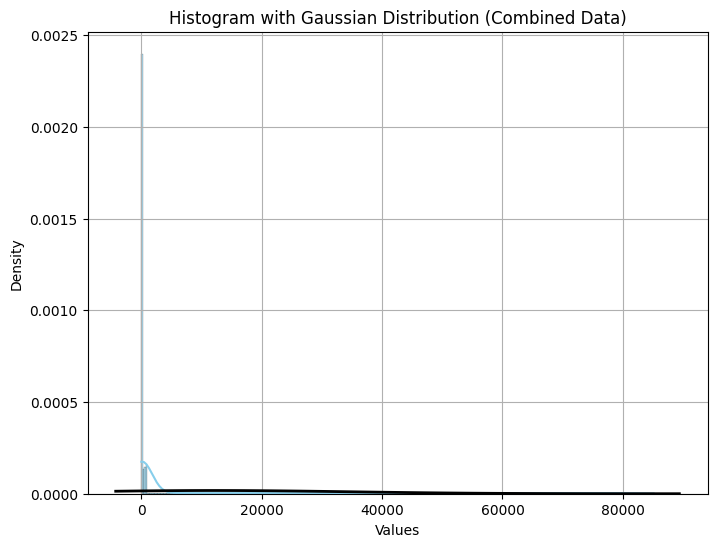

In [ ]:


combined_data = X_train.values.flatten()

# Fit a normal distribution to the combined data
mu, std = norm.fit(combined_data)

# Plot the histogram with fitted normal distribution curve
plt.figure(figsize=(8, 6))
sns.histplot(combined_data, kde=True, stat="density", color='skyblue', alpha=0.7)

# Plot the fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add title and labels
plt.title('Histogram with Gaussian Distribution (Combined Data)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)

plt.show()


Initializing standardization

In [ ]:
#StandardScaler
'''
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)
'''

'\nss = StandardScaler()\n\nX_train = ss.fit_transform(X_train)\n\nX_test= ss.transform(X_test)\n'

### Feature Scaling <a class="anchor" id="11"></a>

In [ ]:

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)


### Train the XGBoost model

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

print("Train accuracy:",model.score(X_train,y_train))
print("Test accuracy:",model.score(X_test,y_test))

y_pred = model.predict(X_test)
print('y_pred:', y_pred)

Train accuracy: 0.3073844377320888
Test accuracy: 0.16020271790189
y_pred: [55.11884   -1.2702774 50.87487   ... 49.221783  38.852585  93.90787  ]


In [ ]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
#Compare Performance
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 47.08326786541658
Mean Squared Error: 7927.3980422228005
Root Mean Squared Error: 89.03593680207335
R-squared: 0.16020271790189


Saving the best model

In [ ]:
# save the model to disk
filename = 'xgb_model.csv'
joblib.dump(y_pred, filename)


['xgb_model.csv']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)

# Convert the loaded model into a pandas DataFrame
loaded_df = pd.DataFrame(loaded_model)

# Now you can access DataFrame methods like info()
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32350 entries, 0 to 32349
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32350 non-null  float32
dtypes: float32(1)
memory usage: 126.5 KB


In [ ]:
loaded_df

,0
0,55.118839
1,-1.270277
2,50.874870
3,6.610482
4,94.417061
...,...
32345,-2.347360
32346,26.989765
32347,49.221783
32348,38.852585


In [ ]:
# save the loaded_df to disk as submission_file
filename = 'submission_file_1.csv'
joblib.dump(loaded_df, filename)


['submission_file_1.csv']